In [ ]:
# Нейросеть, которая различачет нули от всех остальных цифр.

In [ ]:
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.datasets.base import get_data_home
cur_data_home = get_data_home()
mnist = fetch_mldata('MNIST original',data_home=cur_data_home)
# разделение датасета на входные параметры(картинки) и выходные параметры(соответствущие картинками цифры)
x, y = mnist['data'], mnist['target']

In [2]:
# нормализация
x = x / 255

In [3]:
# преобазуем target в новый таргет, где нулям соответуствует 1, а остальным цифрам 0, то есть сужаем задачу до бинарной классификации
y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new

In [4]:
m = 60000 # количество картинок для обучения нейронной сети
m_test = x.shape[0] - m # 10000 - количество картинок для тестирования нейронной сети

x_train, x_test = x[:m].T, x[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1, m_test)

In [5]:
# перемешиваем тренировочные данные для улучшения результатов тренировки
np.random.seed(38)
shuffle_index = np.random.permutation(m)
x_train, y_train = x_train[:,shuffle_index], y_train[:,shuffle_index]

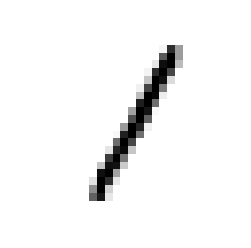

[0.]


In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 900
plt.imshow(x_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,i])

In [11]:
def sigmoid(z): # функция активации
    s = 1 / (1 + np.exp(-z))
    return s

In [12]:
def compute_loss(y, y_pred): # функция ошибки
    m = y.shape[1]
    L = -(1./m) * (np.sum(np.multiply(np.log(y_pred),y)) + np.sum(np.multiply(np.log(1-y_pred), (1-y))))
    return L

In [13]:
learning_rate = 1

x = x_train
y = y_train

n_x = x.shape[0]
m = x.shape[1]

# генерация весов 
W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1,1))

# массив для хранения функции ошибки
cost_arr = []
for i in range(2000):
    # вычисляем результат матричного произведения
    Z = np.matmul(W.T,x) + b
    # прогоняем через функцию активации
    A = sigmoid(Z)
    # считаем функцию ошибки
    cost = compute_loss(y, A)
    cost_arr.append(cost)
    # считаем градиенты
    dW = (1./m) * np.matmul(x, (A-y).T)
    db = (1./m) * np.sum(A-y, axis=1, keepdims=True)
    # обновляем веса с помощью отрицательного градиент
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    if(i % 100 == 0):
        print("Epoch", i, "cost: ", cost)
        
print("Final cost", cost)    

Epoch 0 cost:  0.7055925747010631
Epoch 100 cost:  0.04121746926907383
Epoch 200 cost:  0.03576256100718871
Epoch 300 cost:  0.033218969091791666
Epoch 400 cost:  0.031627747035900065
Epoch 500 cost:  0.030493243336164377
Epoch 600 cost:  0.029624357072468775
Epoch 700 cost:  0.02892874968568935
Epoch 800 cost:  0.02835487077242392
Epoch 900 cost:  0.02787094361687469
Epoch 1000 cost:  0.027455948513811227
Epoch 1100 cost:  0.02709524265958507
Epoch 1200 cost:  0.02677821861652344
Epoch 1300 cost:  0.026496954583102784
Epoch 1400 cost:  0.026245388342563375
Epoch 1500 cost:  0.026018786849964223
Epoch 1600 cost:  0.02581339214570414
Epoch 1700 cost:  0.02562617730676974
Epoch 1800 cost:  0.025454673696983385
Epoch 1900 cost:  0.025296845892695558
Final cost 0.02515240337681562


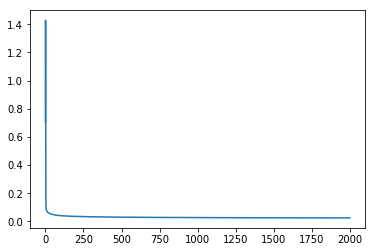

In [22]:
plt.plot(cost_arr, label='train')

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# проверяем сеть на тестовых данных
Z = np.matmul(W.T, x_test) + b
A = sigmoid(Z)

# преобразуем выход сигмоиды в 0 и 1
predictions = (A>0.5)[0,:]
labels = (y_test == 1)[0,:]

# сравниваем предсказание и таргет
cnf_mtr = confusion_matrix(predictions, labels)
print("Correct non-zero digits:", cnf_mtr[0][0])
print("Incorrect non-zero digits:", cnf_mtr[0][1])
print("Correct zero digits:", cnf_mtr[1][1])
print("Incorrect zero digits:", cnf_mtr[1][0])
print("Correct non-zero digits prediction:", cnf_mtr[0][0] / (cnf_mtr[0][1] + cnf_mtr[0][0]) * 100, "%")
print("Correct zero digits prediction:", cnf_mtr[1][1] / (cnf_mtr[1][1] + cnf_mtr[1][0]) * 100, "%")

Correct non-zero digits: 8980
Incorrect non-zero digits: 34
Correct zero digits: 946
Incorrect zero digits: 40
Correct non-zero digits prediction: 99.62280896383403 %
Correct zero digits prediction: 95.94320486815415 %
